In [2]:
run /home/alec/galvanize/capstone/capstone_1/src/suicide_eda.py

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

In [109]:
cumulative_happiness

,country,cumulative_happiness_score
2,Denmark,7.542833
3,Norway,7.537833
0,Switzerland,7.524000
1,Iceland,7.519333
5,Finland,7.515833
...,...,...
78,Bulgaria,4.551833
75,Armenia,4.386000
77,Sri Lanka,4.372333
73,Ukraine,4.369500


In [114]:
suicides

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,hdi_for_year,gdp_for_year_$,gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [132]:
suicides.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [130]:
def compare_suicide_rates(country1, country2):
    country1_mask = suicides['country'] == country1
    country1_df = suicides[country1_mask]
    country1_df_suicide_rate_over_time = country1_df[['year','suicides/100k_pop']]
    country1_df_total_suicide_rate = country1_df_suicide_rate_over_time.groupby(['year']).sum()
    
    country2_mask = suicides['country'] == country2
    country2_df = suicides[country2_mask]
    country2_df_suicide_rate_over_time = country2_df[['year','suicides/100k_pop']]
    country2_df_total_suicide_rate = country2_df_suicide_rate_over_time.groupby(['year']).sum()
    
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(country1_df_total_suicide_rate['suicides/100k_pop'], label=f"Suicides/100k in {country1}")
    ax.plot(country2_df_total_suicide_rate['suicides/100k_pop'], label=f"Suicides/100k in {country2}")
    ax.legend()
    plt.show()

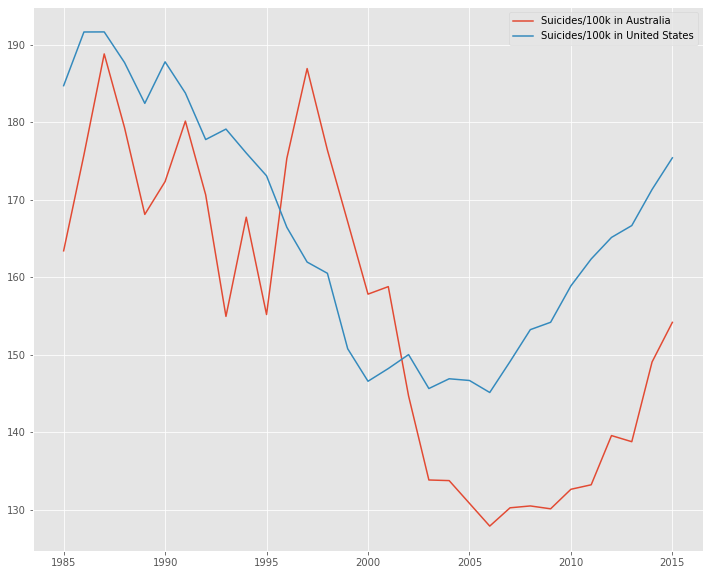

In [131]:
compare_suicide_rates('Australia', 'United States')

In [108]:
country_and_suicide_rate = suicides[['country','year','suicides/100k_pop']]

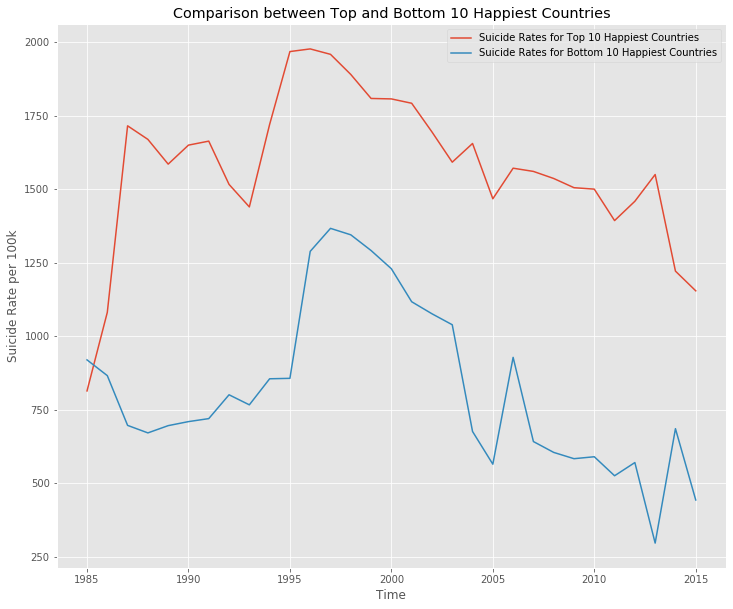

In [148]:
top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
top_10_country_mask = country_and_suicide_rate['country'].isin(top_10_country_list)
top_10_country = country_and_suicide_rate.loc[top_10_country_mask, :]
top_10_sum = top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
bottom_10_country_mask = country_and_suicide_rate['country'].isin(bottom_10_country_list)
bottom_10_country = country_and_suicide_rate.loc[bottom_10_country_mask, :]
bottom_10_sum = bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(top_10_sum['suicides/100k_pop'], label='Suicide Rates for Top 10 Happiest Countries')
ax.plot(bottom_10_sum['suicides/100k_pop'], label='Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

In [135]:
sex_and_suicide_rate = suicides[['country','year','sex','suicides/100k_pop']]

In [136]:
sex_and_suicide_rate

,country,year,sex,suicides/100k_pop
0,Albania,1987,male,6.71
1,Albania,1987,male,5.19
2,Albania,1987,female,4.83
3,Albania,1987,male,4.59
4,Albania,1987,male,3.28
...,...,...,...,...
27815,Uzbekistan,2014,female,2.96
27816,Uzbekistan,2014,female,2.58
27817,Uzbekistan,2014,male,2.17
27818,Uzbekistan,2014,female,1.67


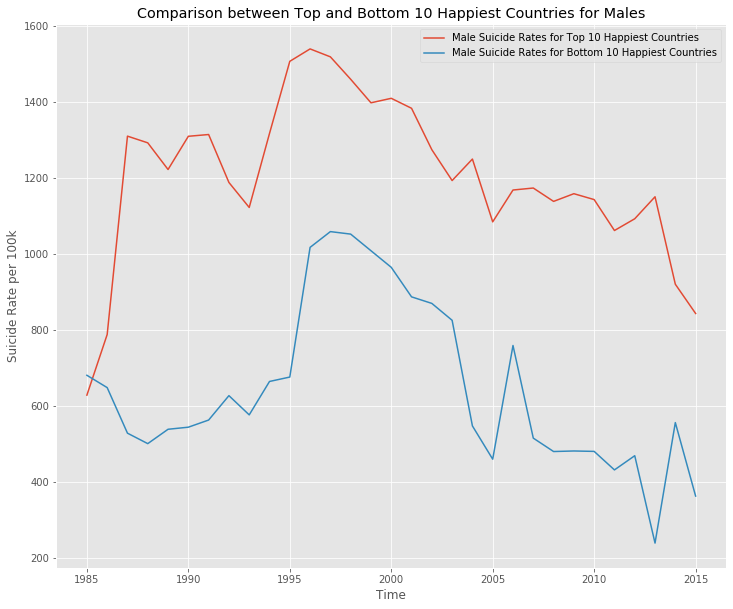

In [151]:
##Combine Female and Male into one subplot##

male_mask = sex_and_suicide_rate['sex'] == 'male'
male_country_and_suicide_rate = sex_and_suicide_rate[male_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
male_top_10_country_mask = male_country_and_suicide_rate['country'].isin(top_10_country_list)
male_top_10_country = male_country_and_suicide_rate.loc[male_top_10_country_mask, :]
male_top_10_sum = male_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
male_bottom_10_country_mask = male_country_and_suicide_rate['country'].isin(bottom_10_country_list)
male_bottom_10_country = male_country_and_suicide_rate.loc[male_bottom_10_country_mask, :]
male_bottom_10_sum = male_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(male_top_10_sum['suicides/100k_pop'], label='Male Suicide Rates for Top 10 Happiest Countries')
ax.plot(male_bottom_10_sum['suicides/100k_pop'], label='Male Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for Males')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

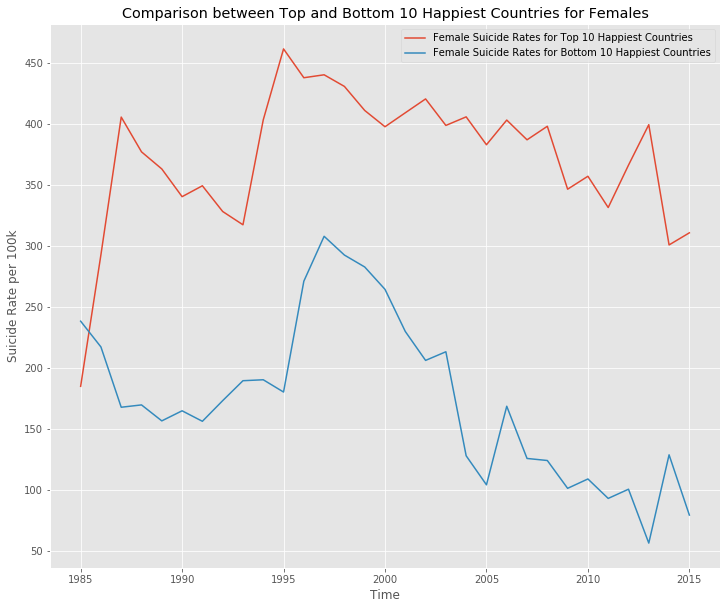

In [152]:
##Combine Female and Male into one subplot##

female_mask = sex_and_suicide_rate['sex'] == 'female'
female_country_and_suicide_rate = sex_and_suicide_rate[female_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
female_top_10_country_mask = female_country_and_suicide_rate['country'].isin(top_10_country_list)
female_top_10_country = female_country_and_suicide_rate.loc[female_top_10_country_mask, :]
female_top_10_sum = female_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
female_bottom_10_country_mask = female_country_and_suicide_rate['country'].isin(bottom_10_country_list)
female_bottom_10_country = female_country_and_suicide_rate.loc[female_bottom_10_country_mask, :]
female_bottom_10_sum = female_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(female_top_10_sum['suicides/100k_pop'], label='Female Suicide Rates for Top 10 Happiest Countries')
ax.plot(female_bottom_10_sum['suicides/100k_pop'], label='Female Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for Females')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

In [133]:
suicides.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [134]:
suicides

,country,year,sex,age,suicides_no,population,suicides/100k_pop,country-year,hdi_for_year,gdp_for_year_$,gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [160]:
age_and_suicide_rate = suicides[['country','year','age','suicides/100k_pop']]
age_and_suicide_rate

,country,year,age,suicides/100k_pop
0,Albania,1987,15-24 years,6.71
1,Albania,1987,35-54 years,5.19
2,Albania,1987,15-24 years,4.83
3,Albania,1987,75+ years,4.59
4,Albania,1987,25-34 years,3.28
...,...,...,...,...
27815,Uzbekistan,2014,35-54 years,2.96
27816,Uzbekistan,2014,75+ years,2.58
27817,Uzbekistan,2014,5-14 years,2.17
27818,Uzbekistan,2014,5-14 years,1.67


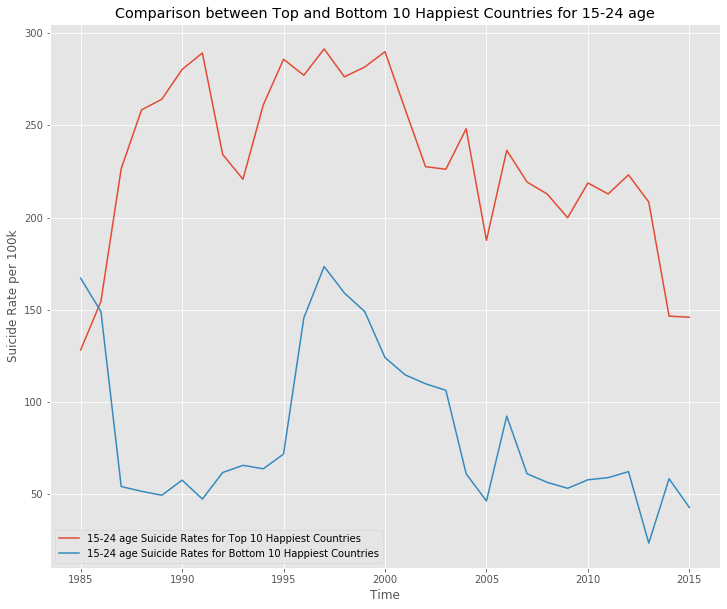

In [226]:
##Don't Need this since I made the updated sub plot down below##

fif_four_mask = age_and_suicide_rate['age'] == '15-24 years'
fif_four_country_and_suicide_rate = sex_and_suicide_rate[fif_four_mask]

top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
fif_four_top_10_country_mask = fif_four_country_and_suicide_rate['country'].isin(top_10_country_list)
fif_four_top_10_country = fif_four_country_and_suicide_rate.loc[fif_four_top_10_country_mask, :]
fif_four_top_10_sum = fif_four_top_10_country.groupby(['year']).sum()[:-1]

bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
fif_four_bottom_10_country_mask = fif_four_country_and_suicide_rate['country'].isin(bottom_10_country_list)
fif_four_bottom_10_country = fif_four_country_and_suicide_rate.loc[fif_four_bottom_10_country_mask, :]
fif_four_bottom_10_sum = fif_four_bottom_10_country.groupby(['year']).sum()[:-1]

fig, ax = plt.subplots(figsize=(12,10))
ax.plot(fif_four_top_10_sum['suicides/100k_pop'], label='15-24 age Suicide Rates for Top 10 Happiest Countries')
ax.plot(fif_four_bottom_10_sum['suicides/100k_pop'], label='15-24 age Suicide Rates for Bottom 10 Happiest Countries')
ax.set_title('Comparison between Top and Bottom 10 Happiest Countries for 15-24 age')
ax.set_ylabel("Suicide Rate per 100k")
ax.set_xlabel("Time")
ax.legend()
plt.show()

In [175]:
##Don't Really Need This##This will produce one individual graph for any given age group##

def age_suicide_comparison(age):
    my_mask = age_and_suicide_rate['age'] == age
    my_age_and_suicide_rate = sex_and_suicide_rate[my_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
    age_top_10_country_mask = my_age_and_suicide_rate['country'].isin(top_10_country_list)
    age_top_10_country = my_age_and_suicide_rate.loc[age_top_10_country_mask, :]
    age_top_10_sum = age_top_10_country.groupby(['year']).sum()[:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    age_bottom_10_country_mask = my_age_and_suicide_rate['country'].isin(bottom_10_country_list)
    age_bottom_10_country = my_age_and_suicide_rate.loc[age_bottom_10_country_mask, :]
    age_bottom_10_sum = age_bottom_10_country.groupby(['year']).sum()[:-1]

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(age_top_10_sum['suicides/100k_pop'], label=f'{age} age Suicide Rates for Top 10 Happiest Countries')
    ax.plot(age_bottom_10_sum['suicides/100k_pop'], label=f'{age} age Suicide Rates for Bottom 10 Happiest Countries')
    ax.set_title(f'Comparison between Top and Bottom 10 Happiest Countries for {age} age')
    ax.set_ylabel("Suicide Rate per 100k")
    ax.set_xlabel("Time")
    ax.legend()
    plt.show()

In [192]:
def age_top_and_bottom(age):
    my_mask = age_and_suicide_rate['age'] == age
    my_age_and_suicide_rate = sex_and_suicide_rate[my_mask]

    top_10_country_list = ['Denmark','Norway','Switzerland','Iceland','Finland','Netherlands','Canada','Sweden','New Zealand','Australia']
    age_top_10_country_mask = my_age_and_suicide_rate['country'].isin(top_10_country_list)
    age_top_10_country = my_age_and_suicide_rate.loc[age_top_10_country_mask, :]
    age_top_10_sum = age_top_10_country.groupby(['year']).sum()[:-1]

    bottom_10_country_list = ['Bosnia and Herzegovina' ,'Greece', 'Mongolia','South Africa','Bulgaria','Armenia','Sri Lanka' ,'Ukraine' ,'Georgia','Albania']
    age_bottom_10_country_mask = my_age_and_suicide_rate['country'].isin(bottom_10_country_list)
    age_bottom_10_country = my_age_and_suicide_rate.loc[age_bottom_10_country_mask, :]
    age_bottom_10_sum = age_bottom_10_country.groupby(['year']).sum()[:-1]
    
    return age_top_10_sum, age_bottom_10_sum

In [193]:
def make_age_graphs(list_of_ages):
    list_of_graphs = [age_top_and_bottom(i) for i in list_of_suicide_ages]
    return list_of_graphs

In [213]:
list_of_suicide_ages=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

In [214]:
age5, age15, age25, age35, age55, age75 = make_age_graphs(list_of_suicide_ages)


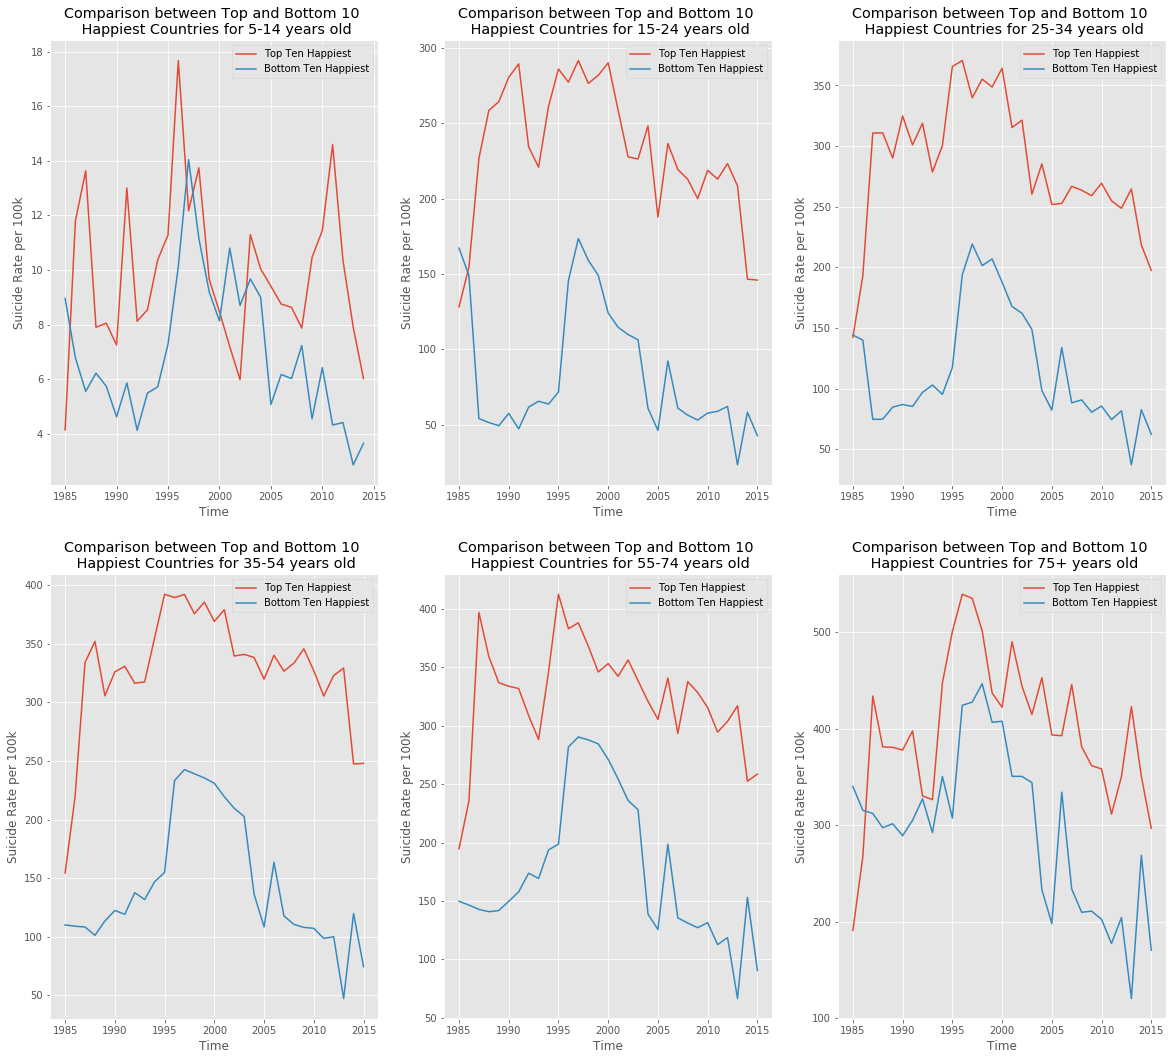

In [225]:
list_of_suicide_ages=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
idx=0

fig, axs = plt.subplots(2,3, figsize=(20,18))
axs=axs.flatten()

for i,df in enumerate([age5, age15, age25, age35, age55, age75]):
    axs[i].plot(df[0]['suicides/100k_pop'], label='Top Ten Happiest')
    axs[i].plot(df[1]['suicides/100k_pop'], label='Bottom Ten Happiest')
    axs[i].set_title(f'Comparison between Top and Bottom 10 \n Happiest Countries for {list_of_suicide_ages[idx]} old')
    axs[i].set_ylabel("Suicide Rate per 100k")
    axs[i].set_xlabel("Time")
    axs[i].legend()
    idx+=1